In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from math import log
from functools import reduce

data = pd.read_csv("https://raw.githubusercontent.com/tigrulya-exe/neural-networks-labs/master/Lab1/data/new.csv", ";", decimal=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
non_nan_data = data[data["КГФ"].notnull() | data["G_total"].notnull()]

In [ ]:
def column_to_float(df, column_name):
    return pd.to_numeric(df[column_name].str.replace(',', '.'))

prepared_df = non_nan_data.copy().reset_index(drop=True)
prepared_df['Тна шлейфе'] = column_to_float(non_nan_data, 'Тна шлейфе')
prepared_df['Pсб.1'] = column_to_float(non_nan_data, 'Pсб.1')

In [ ]:
class_label_columns=["КГФ", "G_total"]

In [ ]:
def info(values_df):
    sum = 0.0
    frequencies = values_df[class_label_columns].value_counts(dropna=False).to_dict()
    for frequency in frequencies.values():
        p = frequency / len(values_df)
        sum += p * log(p, 2)
    return -sum

def column_info(values_df, groups_by_column):
    sum = 0.0
    for group_row_indexes in groups_by_column.values():
        p = len(group_row_indexes) / len(values_df)
        sum += p * info(values_df.iloc[group_row_indexes])
    return sum

def split_info(values_df, groups_by_column):
    sum = 0.0
    for group_row_indexes in groups_by_column.values():
        p = len(group_row_indexes) / len(values_df)
        sum += p * log(p, 2)
    return -sum

def gain_ratio(info, values_df, column):
    groups_by_column = values_df.groupby(column).groups
    return (info - column_info(values_df, groups_by_column)) / split_info(values_df, groups_by_column)

replaced_df = prepared_df.fillna("NaN")
df_info = info(replaced_df)
column_gain_ratio = dict([(col, gain_ratio(df_info, replaced_df, col)) for col in replaced_df[replaced_df.columns.drop(class_label_columns)]])

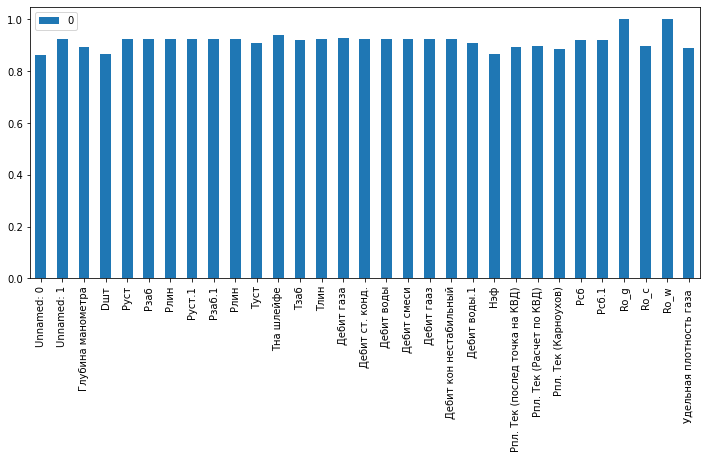

In [ ]:
pd.DataFrame.from_dict(column_gain_ratio, orient="index").plot.bar(figsize = (12, 5))

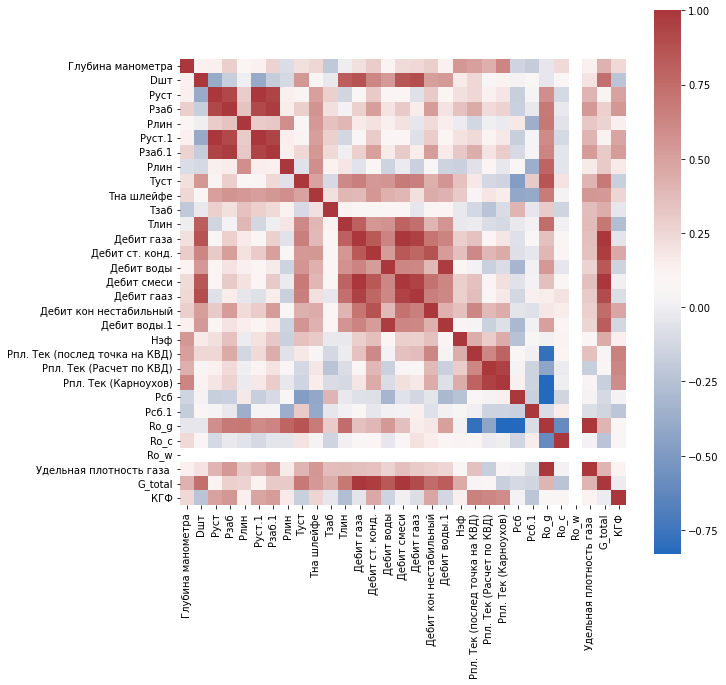

In [ ]:
plt.figure(figsize=(10,10))
corr = prepared_df.iloc[:, 1:].corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True,
           cmap="vlag")

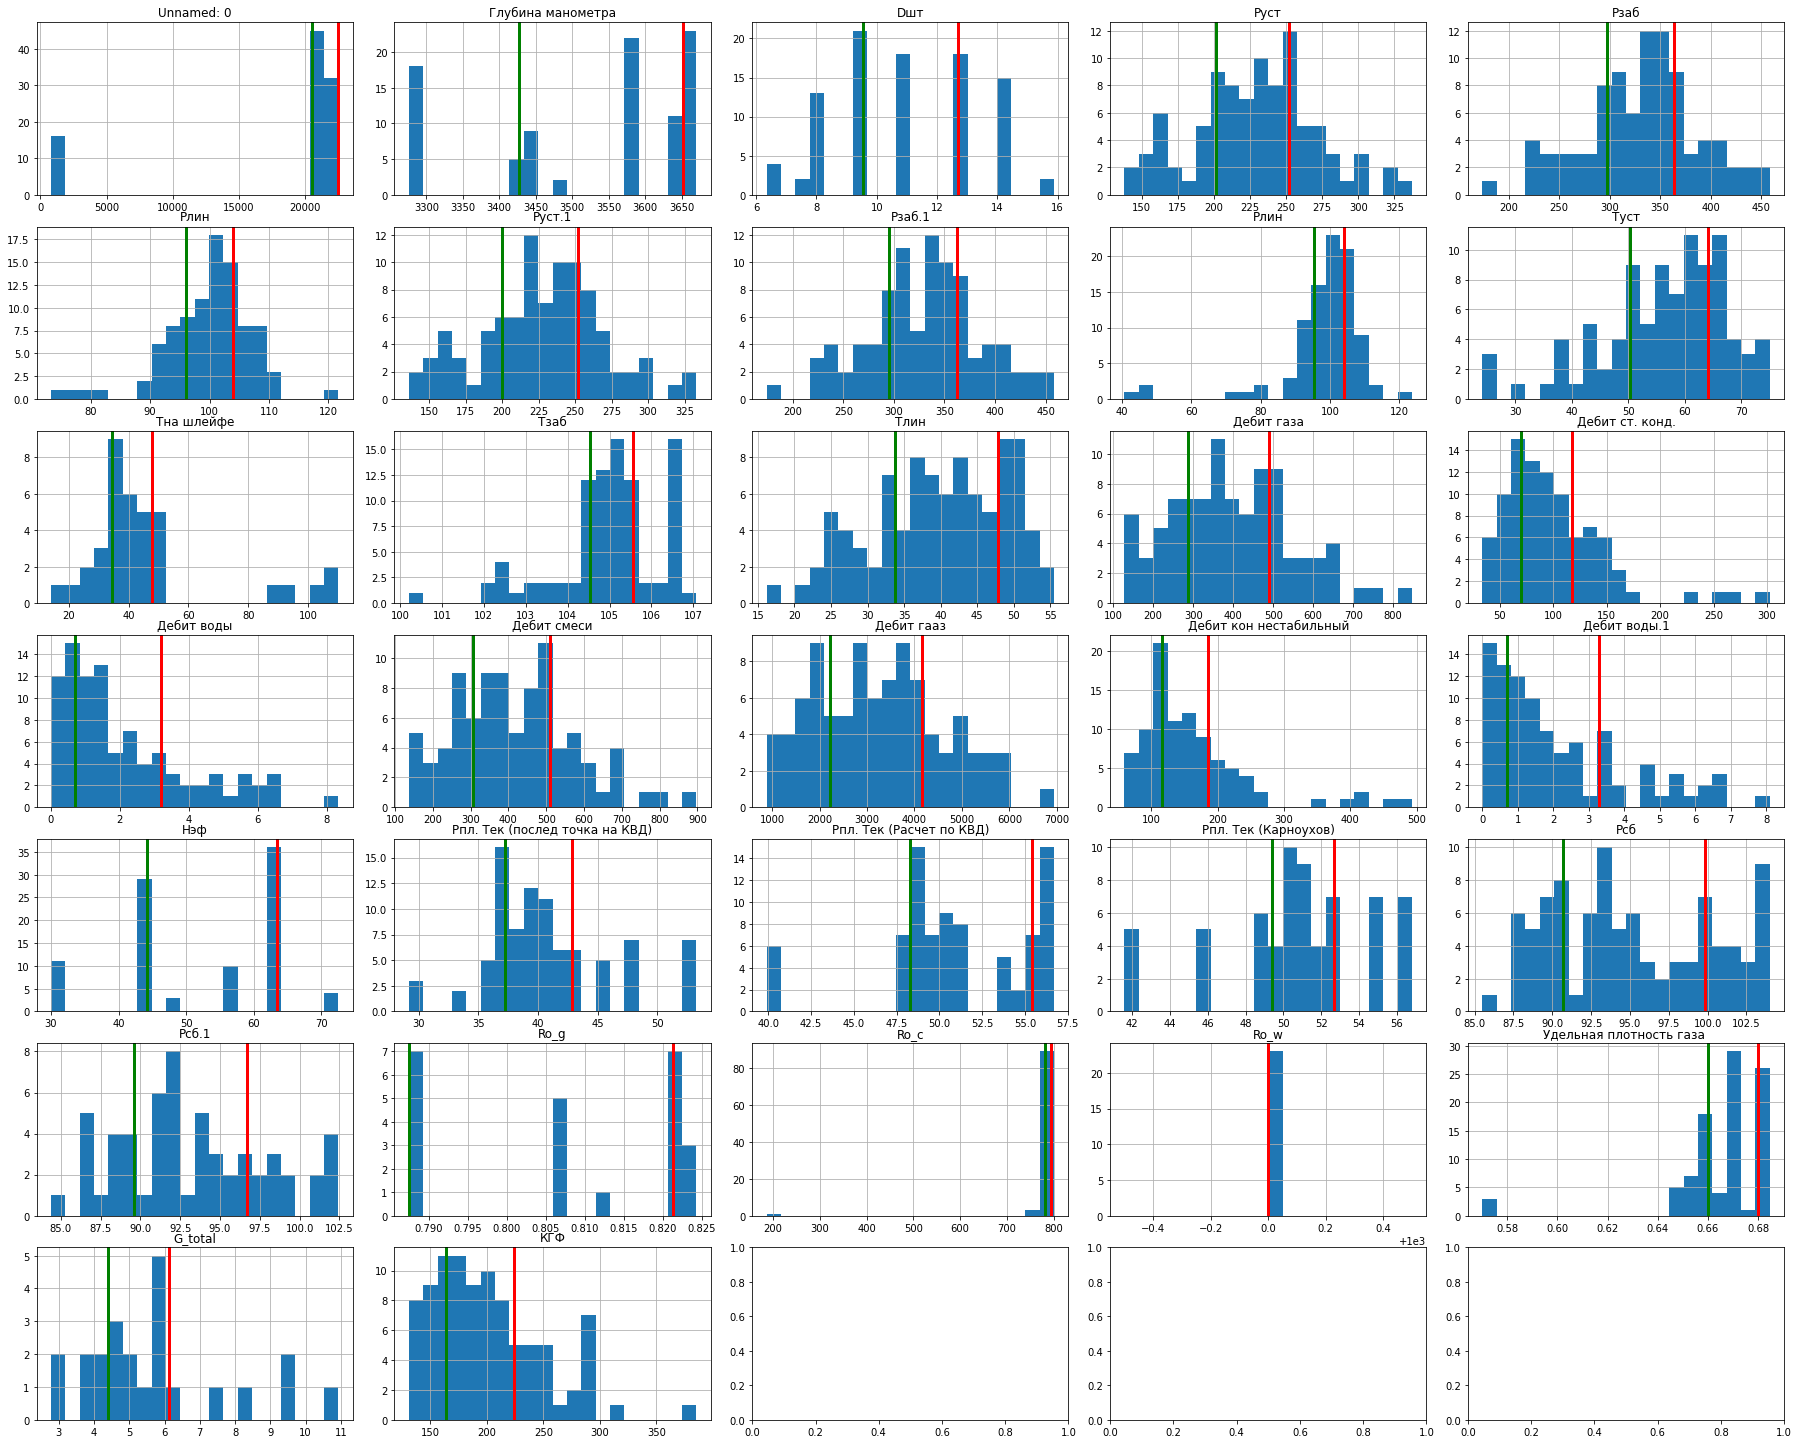

In [ ]:
fig, axes = plt.subplots(figsize = (25, 20), nrows=7, ncols=5)
fig.tight_layout()
flat_ax = [ax for axs in axes for ax in axs]

i = 0
for column in prepared_df.columns.drop(["Unnamed: 1"]):
    flat_ax[i].set_title(column)
    prepared_df[column].hist(ax = flat_ax[i], bins = 20)
    flat_ax[i].axvline(prepared_df[column].quantile(.25), color = "green", lw = 3)
    flat_ax[i].axvline(prepared_df[column].quantile(.75), color = "red", lw = 3)
    i += 1

In [ ]:
def build_info_row(column):
    stats = column.describe()
    row = dict()

    row['Name'] = column.name
    row['Count'] = len(column)
    row['NaN %'] = column.isna().sum() * 100 // row['Count']
    row['Min'] = stats['min']
    row['Max'] = stats['max']
    row['Mean'] = stats['mean']
    row['Q1'] = stats['25%']
    row['Q2'] = stats['50%']
    row['Q3'] = stats['75%']
    row['Std deviation'] = stats.std()
    row['Interquartile range'] = row['Q3'] - row['Q1']
    row['Cardinality'] = column.nunique()

    return row


info_rows = [build_info_row(prepared_df[column]) for column in prepared_df.columns.drop(["Unnamed: 1"])]

In [ ]:
column_info = pd.DataFrame(info_rows)
column_info.set_index('Name', inplace = True)
column_info

,Count,NaN %,Min,Max,Mean,Q1,Q2,Q3,Std deviation,Interquartile range,Cardinality
Name,,,,,,,,,,,
Unnamed: 0,93,0,804.0000,22503.0000,18004.150538,20503.0000,21203.000,22501.0000,9702.801336,1998.0000,8
Глубина манометра,93,3,3276.0000,3670.0000,3524.086667,3427.6250,3579.000,3652.2500,1580.979239,224.6250,20
Dшт,93,0,6.3500,15.8800,10.951183,9.5300,11.110,12.7000,29.675852,3.1700,10
Руст,93,0,138.1600,337.1100,228.293871,201.6400,229.890,252.0000,94.648860,50.3600,87
Рзаб,93,3,174.0000,458.6000,331.762222,297.7975,337.790,364.1500,141.682707,66.3525,88
Pлин,93,0,73.3100,121.6800,99.861075,95.9500,100.800,103.8700,34.843806,7.9200,90
Руст.1,93,0,136.0000,333.0000,227.644624,200.0000,228.000,252.0000,93.767026,52.0000,73
Рзаб.1,93,3,174.0000,458.5000,330.334444,294.6250,334.250,362.1500,141.022258,67.5250,89
Рлин,93,0,40.7400,123.6200,98.005376,95.3400,100.260,104.0000,37.093586,8.6600,87


Признаки с более, чем 60% пропусков

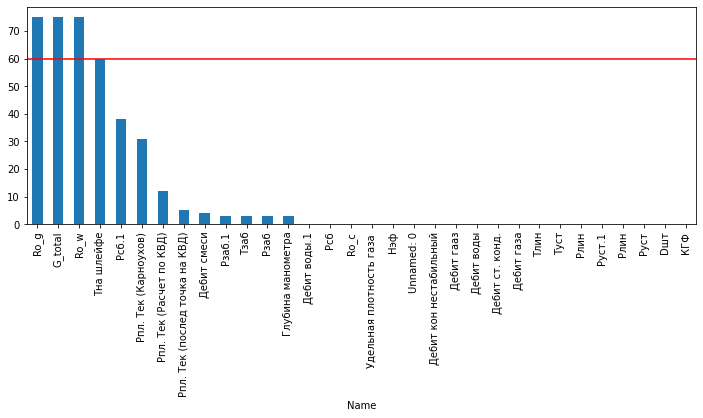

In [ ]:
column_info["NaN %"].sort_values(ascending=False).plot.bar(figsize=(12, 4))
plt.axhline(y=60, c ="red")

Признаки с единственным значением (единичной мощностью)

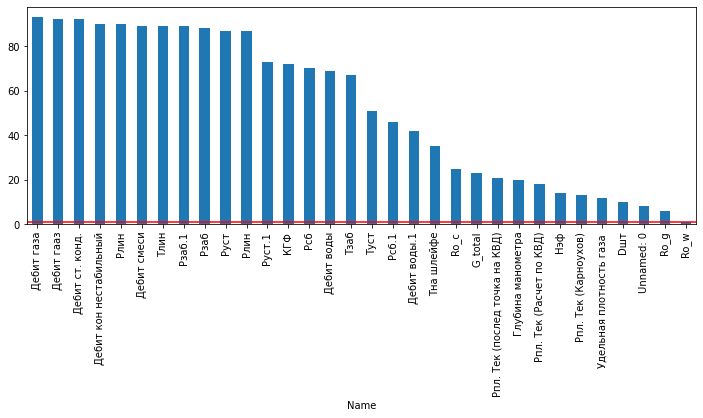

In [ ]:
column_info["Cardinality"].sort_values(ascending=False).plot.bar(figsize=(12, 4))
plt.axhline(y=1, c ="red")

Сравниваем разрыв между медианой и третьим квантилем и третьим квартилем и максимальным значением

In [ ]:
diffs = pd.DataFrame(index = column_info.index)
diffs["Q2 -> Q3"] = column_info["Q3"] - column_info["Q2"]
diffs["Q3 -> max"] = column_info["Max"] - column_info["Q3"]
diffs

,Q2 -> Q3,Q3 -> max
Name,,
Unnamed: 0,1298.0000,2.0000
Глубина манометра,73.2500,17.7500
Dшт,1.5900,3.1800
Руст,22.1100,85.1100
Рзаб,26.3600,94.4500
Pлин,3.0700,17.8100
Руст.1,24.0000,81.0000
Рзаб.1,27.9000,96.3500
Рлин,3.7400,19.6200


In [ ]:
prepared_df[prepared_df.columns[12:]]

,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,103.20,32.50,214.70,83.6,0.40,231.25,1610.37,131.3,0.4,56.80,...,56.5,NaN,93.6,92.38,0.806,801.0,1000.0,0.6694,2.78,311.91
1,103.00,38.60,290.59,104.7,1.40,309.00,2310.23,158.5,1.4,56.80,...,56.5,NaN,92.9,91.69,0.806,801.0,1000.0,0.6694,3.70,288.60
2,102.60,43.40,368.04,114.3,1.90,388.11,3039.49,172.3,1.9,56.80,...,56.5,NaN,91.4,90.20,0.806,801.0,1000.0,0.6694,4.52,248.79
3,102.00,46.10,434.66,121.3,3.30,455.21,3824.08,181.5,3.3,56.80,...,56.5,NaN,89.2,88.03,0.806,801.0,1000.0,0.6694,5.22,223.56
4,104.40,49.90,483.28,129.8,4.60,504.59,4299.10,190.6,4.7,56.80,...,56.5,NaN,89.7,88.53,0.806,801.0,1000.0,0.6694,5.77,215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,104.78,46.30,479.09,93.5,4.70,495.63,4165.00,156.8,4.8,44.50,...,40.5,41.6,94.4,94.74,NaN,782.0,NaN,0.6600,NaN,153.00
89,104.63,50.50,568.50,106.6,6.40,587.36,5113.00,174.3,6.5,44.50,...,40.5,41.6,94.0,NaN,NaN,782.0,NaN,0.6600,NaN,147.00
90,104.40,28.10,215.80,50.5,0.45,224.86,1759.00,84.7,0.4,48.37,...,NaN,NaN,89.9,NaN,NaN,779.6,NaN,0.6700,NaN,182.00
91,104.60,41.30,387.68,72.0,1.50,403.75,3454.00,123.0,1.6,48.37,...,NaN,NaN,90.8,NaN,NaN,779.6,NaN,0.6700,NaN,145.00
